In [132]:
import pandas as pd
df = pd.read_csv("empl_salary.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [133]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [134]:
df.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [135]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [136]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

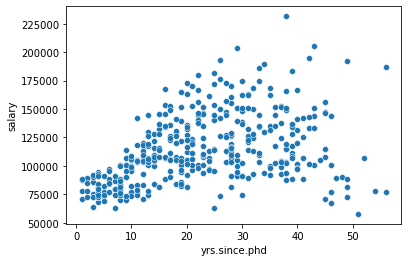

In [137]:
import seaborn as sns
sns.scatterplot(x='yrs.since.phd', y='salary', data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

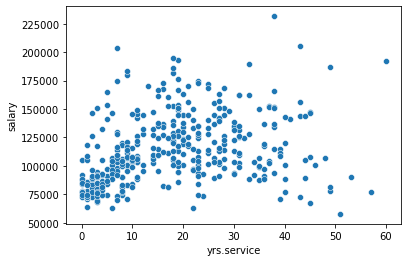

In [138]:
sns.scatterplot(x='yrs.service', y='salary', data=df)

In [139]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

In [140]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
list1 = ['rank','discipline','sex']

for i in list1:
    df[i] = le.fit_transform(df[i].values.reshape(-1,1))
    
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [147]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [158]:
x = df.drop(['salary'], axis=1)
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1.0,19,18,1
1,2,1.0,20,16,1
2,1,1.0,4,3,1
3,2,1.0,45,39,1
4,2,1.0,40,41,1
...,...,...,...,...,...
392,2,0.0,33,30,1
393,2,0.0,31,19,1
394,2,0.0,42,25,1
395,2,0.0,25,15,1


In [159]:
y = df['salary']
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [160]:
from sklearn.preprocessing import StandardScaler
# mean=0 and std=1
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.64925739,  0.91540317, -0.25754973,  0.02966908,  0.3300584 ],
       [ 0.64925739,  0.91540317, -0.17985426, -0.12429986,  0.3300584 ],
       [-0.67256406,  0.91540317, -1.42298184, -1.12509795,  0.3300584 ],
       ...,
       [ 0.64925739, -1.09241483,  1.52944617,  0.56856036,  0.3300584 ],
       [ 0.64925739, -1.09241483,  0.20862311, -0.20128433,  0.3300584 ],
       [-0.67256406, -1.09241483, -1.11219995, -1.04811348,  0.3300584 ]])

rank                AxesSubplot(0.125,0.657941;0.110714x0.222059)
discipline       AxesSubplot(0.257857,0.657941;0.110714x0.222059)
yrs.since.phd    AxesSubplot(0.390714,0.657941;0.110714x0.222059)
yrs.service      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
sex              AxesSubplot(0.656429,0.657941;0.110714x0.222059)
salary           AxesSubplot(0.789286,0.657941;0.110714x0.222059)
dtype: object

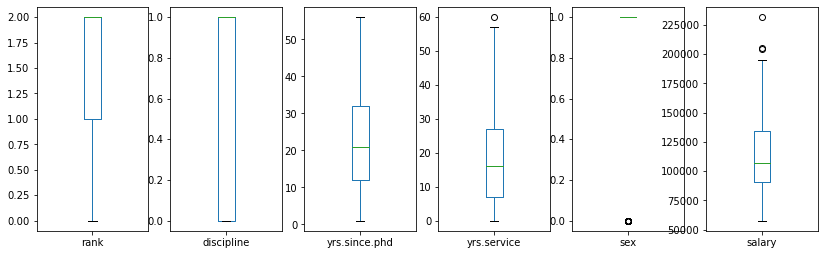

In [161]:
df.plot(kind='box', subplots=True, layout=(3,6), figsize=(14,14))

In [162]:
maxscore=0
maxRS=0

import numpy as np
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    lm = LinearRegression()
    lm.fit(x_train,y_train)
    predlm = lm.predict(x_test)
    lmscore = round(lm.score(x_train,y_train),4)
    
    if lmscore>maxscore:
        maxscore=lmscore
        maxRS=i

print('At random state', i,'lm score is: ', round(lm.score(x_train,y_train),4))
print('Mean Squared error is: ', mean_squared_error(y_test,predlm))
print('Root Mean Squared error is: ', np.sqrt(mean_squared_error(y_test,predlm)), '\n')

At random state 999 lm score is:  0.3677
Mean Squared error is:  605569213.7228369
Root Mean Squared error is:  24608.315946501436 



In [163]:
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)   

Best R2 score is 0.5352462039914034 on Random State 972


In [154]:
i = 999
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=i)
lm = LinearRegression()
lm.fit(x_train,y_train)
predlm = lm.predict(x_test)
print('At random state', i,'lm score is: ', round(lm.score(x_train,y_train),4))
print('Mean Squared error is: ', mean_squared_error(y_test,predlm)*100)
print('Root Mean Squared error is: ', np.sqrt(mean_squared_error(y_test,predlm))*100, '\n')

At random state 999 lm score is:  0.3677
Mean Squared error is:  60556921372.28368
Root Mean Squared error is:  2460831.5946501438 



In [155]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lm.predict(x_test))
df_com = pd.DataFrame({'Original': a, 'Predicted':predicted}, index = range(len(a)))
df_com

,Original,Predicted
0,128800,116452.396618
1,95611,95372.555919
2,122875,117634.670955
3,86250,95693.592410
4,88650,72411.718446
...,...,...
75,97032,102307.429906
76,136660,117574.255510
77,127100,116992.597973
78,126621,131862.299078


### Below is the rough work (Just a try to make the model better but couldn't)

In [165]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred = ad.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,ad_pred))
print('Confusion Matrix', confusion_matrix(y_test,ad_pred))
print('Classification Report',classification_report(y_test,ad_pred))

Accuracy Score 0.0
Confusion Matrix [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report               precision    recall  f1-score   support

       57800       0.00      0.00      0.00       1.0
       62884       0.00      0.00      0.00       1.0
       63100       0.00      0.00      0.00       1.0
       70000       0.00      0.00      0.00       1.0
       72300       0.00      0.00      0.00       1.0
       73266       0.00      0.00      0.00       1.0
       73800       0.00      0.00      0.00       1.0
       74000       0.00      0.00      0.00       0.0
       77081       0.00      0.00      0.00       1.0
       77500       0.00      0.00      0.00       0.0
       78182       0.00      0.00      0.00       1.0
       78500       0.00      0.00      0.00       1.0
       81035       0.00      0.00      0.00       1.0
       82100       0.00      0.00      0.00       1.0
       8390

C:\Users\Sumit Sarkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit Sarkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
ad=AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred = ad.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,ad_pred))
print('Confusion Matrix', confusion_matrix(y_test,ad_pred))
print('Classification Report',classification_report(y_test,ad_pred))

Accuracy Score 0.0
Confusion Matrix [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report               precision    recall  f1-score   support

       57800       0.00      0.00      0.00       1.0
       62884       0.00      0.00      0.00       1.0
       63100       0.00      0.00      0.00       1.0
       70000       0.00      0.00      0.00       1.0
       72300       0.00      0.00      0.00       1.0
       73266       0.00      0.00      0.00       1.0
       73800       0.00      0.00      0.00       1.0
       74000       0.00      0.00      0.00       0.0
       77081       0.00      0.00      0.00       1.0
       77500       0.00      0.00      0.00       0.0
       78182       0.00      0.00      0.00       1.0
       78500       0.00      0.00      0.00       1.0
       81035       0.00      0.00      0.00       1.0
       81800       0.00      0.00      0.00       0.0
       8210

C:\Users\Sumit Sarkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit Sarkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,gb_pred))
print('Confusion Matrix', confusion_matrix(y_test,gb_pred))
print('Classification Report',classification_report(y_test,gb_pred))

Accuracy Score 0.025
Confusion Matrix [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report               precision    recall  f1-score   support

       57800       0.00      0.00      0.00         1
       62884       0.00      0.00      0.00         1
       63100       0.00      0.00      0.00         1
       68404       0.00      0.00      0.00         0
       70000       0.00      0.00      0.00         1
       70700       0.00      0.00      0.00         0
       72300       0.00      0.00      0.00         1
       73266       0.00      0.00      0.00         1
       73300       0.00      0.00      0.00         0
       73800       0.00      0.00      0.00         1
       73877       0.00      0.00      0.00         0
       74000       0.00      0.00      0.00         0
       74500       0.00      0.00      0.00         0
       74692       0.00      0.00      0.00         0
       75

C:\Users\Sumit Sarkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sumit Sarkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [169]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {'criterion':['gini','entropy']}

gd_sr = GridSearchCV(estimator=dtc, param_grid=grid_param, scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

ValueError: n_splits=5 cannot be greater than the number of members in each class.